## Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
pt.rcParams['figure.figsize'] = (12,4)
pt.rcParams['axes.grid'] = True
pt.rcParams['font.size'] = 14
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read csv Files

In [2]:
df=pd.read_csv('Groceries_TS_And_ARM_dataset.csv',parse_dates=['Date'])

C:\Users\jeeva\AppData\Local\Temp\ipykernel_5788\212246573.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('Groceries_TS_And_ARM_dataset.csv',parse_dates=['Date'])


In [3]:
df.head(5)

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [4]:
#df=df.set_index(['Date'])

## Quick Analysis for the data set

In [5]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [6]:
df.shape

(38765, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [8]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [9]:
df['Month']=df.Date.dt.month
df['Year']=df.Date.dt.year
df['Day']=df.Date.dt.day
df['Day of week']=df.Date.dt.strftime("%A")

## EDA

In [10]:
df.head(2)

,Member_number,Date,itemDescription,Month,Year,Day,Day of week
0,1808,2015-07-21,tropical fruit,7,2015,21,Tuesday
1,2552,2015-05-01,whole milk,5,2015,1,Friday


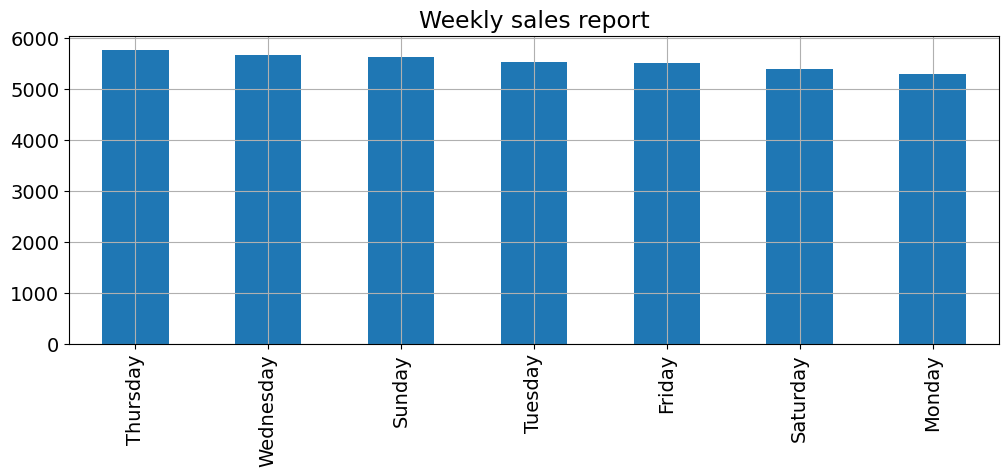

In [11]:
pt.figsize=(6,2)
df['Day of week'].value_counts().plot(kind='bar')
pt.title('Weekly sales report')
pt.show()

Week in saturday is highest sales

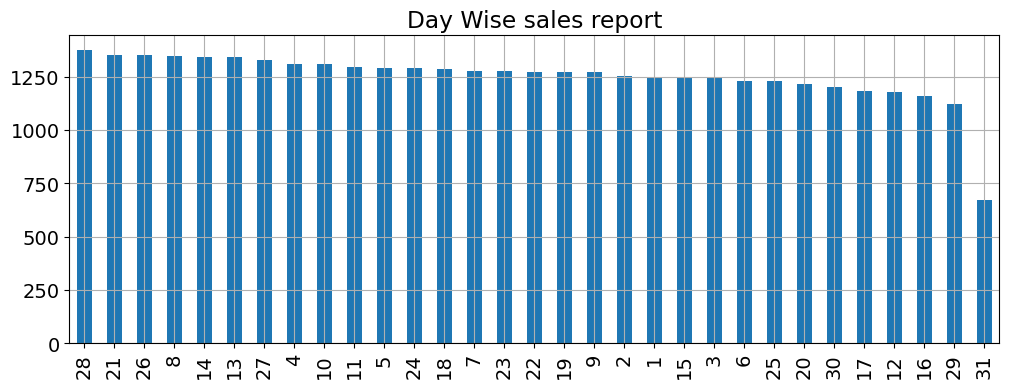

In [12]:
pt.figsize=(6,2)
df['Day'].value_counts().plot(kind='bar')
pt.title('Day Wise sales report')
pt.show()

Day in 15 is highest sales because this pongal festivel time

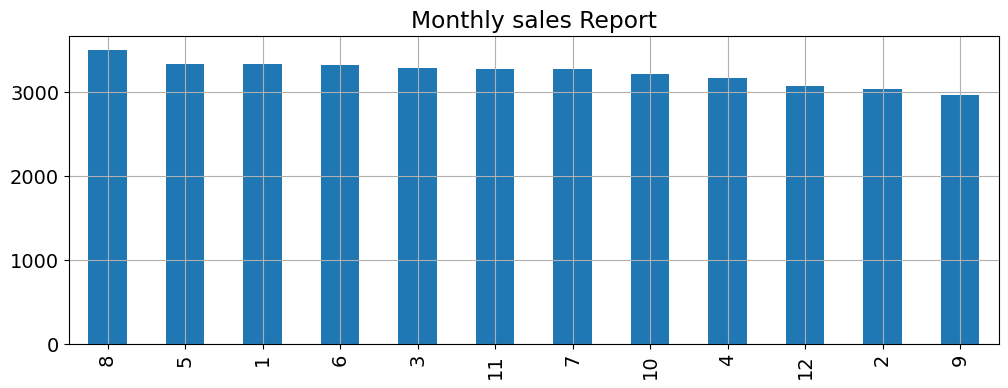

In [13]:
df['Month'].value_counts().plot(kind='bar')
pt.title('Monthly sales Report')
pt.show()

Month of January in highest sales.

In [14]:
d=pd.DataFrame(df.groupby('Date')['itemDescription'].nunique().index)
d['Invoice_count']=df.groupby('Date')['Member_number'].nunique().values
d['Item_purchase_count']=df.groupby('Date')['itemDescription'].nunique().values
d['Item']=df.groupby('Date')['itemDescription'].unique().values
d.set_index('Date',inplace=True)

In [15]:
d.head()

,Invoice_count,Item_purchase_count,Item
Date,,,
2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
2014-01-02,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
2014-01-03,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."
2014-01-04,28,33,"[frankfurter, pastry, salty snack, bottled bee..."
2014-01-05,20,31,"[sausage, root vegetables, whipped/sour cream,..."


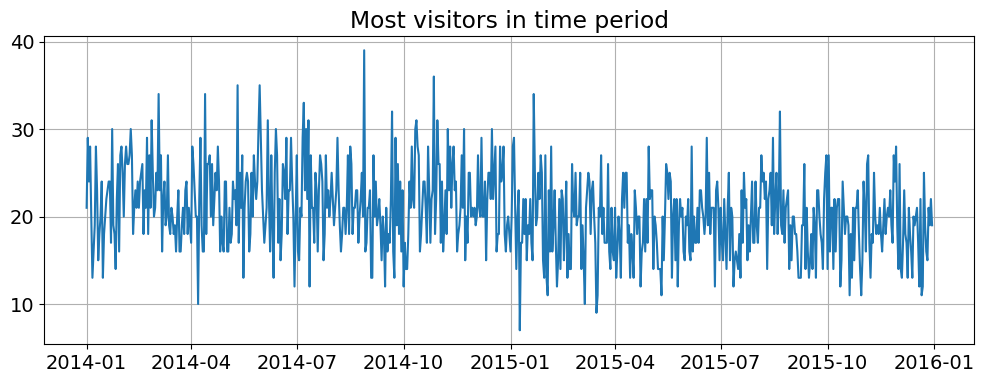

In [16]:
pt.plot(d['Invoice_count'])
pt.title('Most visitors in time period')
pt.show()

## Apriori algorithm

In [17]:
from apyori import apriori
from mlxtend.frequent_patterns import association_rules
df

,Member_number,Date,itemDescription,Month,Year,Day,Day of week
0,1808,2015-07-21,tropical fruit,7,2015,21,Tuesday
1,2552,2015-05-01,whole milk,5,2015,1,Friday
2,2300,2015-09-19,pip fruit,9,2015,19,Saturday
3,1187,2015-12-12,other vegetables,12,2015,12,Saturday
4,3037,2015-01-02,whole milk,1,2015,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,8,2014,10,Sunday
38761,2022,2014-02-23,candy,2,2014,23,Sunday
38762,1097,2014-04-16,cake bar,4,2014,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,3,2014,12,Wednesday


In [18]:
trans=[]
for i in d['Item']:
    trans.append(i)

In [19]:
trans[3]

array(['frankfurter', 'pastry', 'salty snack', 'bottled beer',
       'male cosmetics', 'margarine', 'cat food', 'rolls/buns', 'dessert',
       'whole milk', 'tropical fruit', 'root vegetables', 'beef',
       'whipped/sour cream', 'canned fish', 'sausage', 'prosecco',
       'white bread', 'berries', 'oil', 'domestic eggs', 'soda',
       'frozen meals', 'frozen fish', 'fruit/vegetable juice', 'yogurt',
       'flour', 'house keeping products', 'coffee', 'seasonal products',
       'brown bread', 'long life bakery product', 'hair spray'],
      dtype=object)

In [20]:
re = apriori(trans, min_support=0.0003, min_confidance=0.01, min_lift=3, min_length=2, max_length=2)

In [21]:
re

<generator object apriori at 0x000001F46C9D0460>

In [22]:
Re=list(re)

In [23]:
df_re=pd.DataFrame(Re)

In [24]:
df_re.head()

,items,support,ordered_statistics
0,"(baby cosmetics, Instant food products)",0.002747,"[((Instant food products), (baby cosmetics), 0..."
1,"(bags, Instant food products)",0.001374,"[((Instant food products), (bags), 0.017543859..."
2,"(Instant food products, liqueur)",0.004121,"[((Instant food products), (liqueur), 0.052631..."
3,"(abrasive cleaner, cleaner)",0.005495,"[((abrasive cleaner), (cleaner), 0.18181818181..."
4,"(baby cosmetics, artif. sweetener)",0.001374,"[((artif. sweetener), (baby cosmetics), 0.0357..."


In [25]:
support=df_re.support

In [26]:
f_v=[]
s_v=[]
t_v=[]
fo_v=[]
for j in range(df_re.shape[0]):
    s_l=df_re['ordered_statistics'][j][0]
    f_v.append(list(s_l[0]))
    s_v.append(list(s_l[1]))
    t_v.append((s_l[2]))
    fo_v.append((s_l[3]))

In [27]:
hs=pd.DataFrame(f_v)
ds=pd.DataFrame(s_v)

In [28]:
con=pd.DataFrame(t_v,columns=['Confidence'])
eft=pd.DataFrame(fo_v,columns=['Lift'])

In [47]:
df_final=pd.concat([hs,ds,support,con,eft],axis=1)

In [48]:
df_final.columns=['Antecedent','Consequent','Support','Confidence','Lift']

In [49]:
df_final.head()

,Antecedent,Consequent,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.035088,8.514620
1,Instant food products,bags,0.001374,0.017544,3.192982
2,Instant food products,liqueur,0.004121,0.052632,4.257310
3,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
4,artif. sweetener,baby cosmetics,0.001374,0.035714,8.666667


In [52]:
def find_associated_products(product_name, rules_df):
    filtered_rules = df_final[(df_final['Antecedent'] == product_name) | (df_final['Consequent'] == product_name)]

    # Display the associated product combinations
    associated_combinations = pd.DataFrame({
        'Antecedent': filtered_rules['Antecedent'],
        'Consequent': filtered_rules['Consequent'],
        'Support': filtered_rules['Support'],
        'Confidence': filtered_rules['Confidence'],
        'Lift': filtered_rules['Lift']
    })

    return associated_combinations

# Example usage
product_name_input = input('Enter the Product Name:')
result = find_associated_products(product_name_input, df_rules)
print(result)


Enter the Product Name:artif. sweetener
          Antecedent            Consequent   Support  Confidence      Lift
4   artif. sweetener        baby cosmetics  0.001374    0.035714  8.666667
5   artif. sweetener          cocoa drinks  0.002747    0.071429  3.250000
6   artif. sweetener              cookware  0.002747    0.071429  3.058824
7   artif. sweetener        frozen chicken  0.001374    0.035714  5.200000
8   artif. sweetener                 honey  0.002747    0.071429  4.000000
9   artif. sweetener       rubbing alcohol  0.001374    0.035714  5.200000
10  artif. sweetener  specialty vegetables  0.002747    0.071429  4.727273
11  artif. sweetener                   tea  0.004121    0.107143  3.000000


In [32]:
df_final.shape

(242, 5)

<AxesSubplot: >

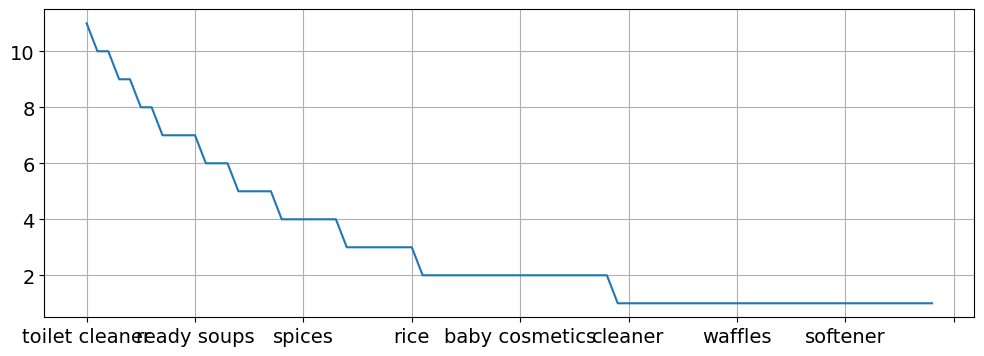

In [42]:
df_final['Item 2'].value_counts().plot()

<AxesSubplot: >

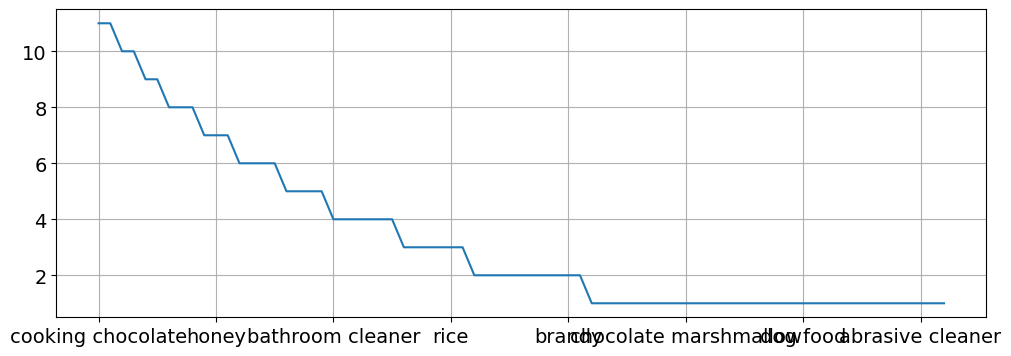

In [37]:
df_final['Item 1'].value_counts().plot()

## 1. Exploratory Data Analysis (EDA):

**Weekly Sales Report:**

The day of the week with the highest sales is Saturday.

**Day Wise Sales Report:**

The 15th day of the month has the highest sales, possibly due to the Pongal festival.

**Monthly Sales Report:**

January has the highest sales among all months.

**Visitor Analysis:**

The graph depicting the number of invoices over time indicates variations in visitor counts.

## 2. Apriori Algorithm:

**Association Rules:**

Implemented Apriori algorithm to discover association rules among item purchases.

**Results:**

Extracted rules with specified parameters (support, confidence, lift).

**Visualization:**

Plotted counts of 'Item 1' and 'Item 2' to visualize the frequency of each item in the rules.

## Key Findings:

**Association Rules:**

Identified frequent itemsets and association rules based on the provided parameters.
Analyzed support, confidence, and lift to understand the strength and significance of the rules.

**Item Frequencies:**

Visualized the counts of 'Item 1' and 'Item 2' in the association rules.

**Next Steps:**

**Further Analysis:**

Explore patterns and trends within the association rules.
Investigate specific items or item combinations that appear frequently in transactions.

**Optimization:**

Fine-tune parameters of the Apriori algorithm for better rule discovery.
Experiment with different support, confidence, and lift thresholds to identify meaningful patterns.

**Business Insights:**

Translate the discovered rules into actionable insights for the retail business.
Provide recommendations for product placement, promotions, or inventory management based on association rules.

**Visualizations:**

Create additional visualizations to communicate findings effectively.

**Conclusion:**

The combination of Exploratory Data Analysis and Apriori algorithm provides valuable insights into customer purchasing patterns. By understanding these patterns, retailers can make informed decisions to enhance customer experience, optimize sales, and improve overall business strategies.

Adjustments and refinements to the analysis can be made based on specific business objectives and the evolving nature of customer behavior. Regularly revisiting and updating the analysis ensures that the insights remain relevant and beneficial for decision-making